In [1]:
!pip install textblob vaderSentiment

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/content/sample_data/student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
df = df.drop(columns=["Unnamed: 0"])


In [6]:
df.isna().sum()

# Check duplicates
df.duplicated().sum()
df = df.drop_duplicates()


In [7]:
rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')

# Optional: keep only rows where ratings are between 1 and 10
for col in rating_cols:
    df = df[(df[col] >= 1) & (df[col] <= 10)]


In [8]:
df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df['Overall_Satisfaction'].describe()


,Overall_Satisfaction
count,1001.000000
mean,5.915460
std,0.894734
min,3.375000
25%,5.250000
50%,5.875000
75%,6.625000
max,8.250000


In [9]:
teaching_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations'
]

course_design_cols = [
    'Degree of difficulty of assignments',
    'Structuring of the course'
]

support_cols = [
    'Solves doubts willingly',
    'Provides support for students going above and beyond'
]

df['Teaching_Quality'] = df[teaching_cols].mean(axis=1)
df['Course_Design'] = df[course_design_cols].mean(axis=1)
df['Support_Quality'] = df[support_cols].mean(axis=1)


In [10]:
mean_scores = df[rating_cols].mean().sort_values(ascending=False)
print(mean_scores)


Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


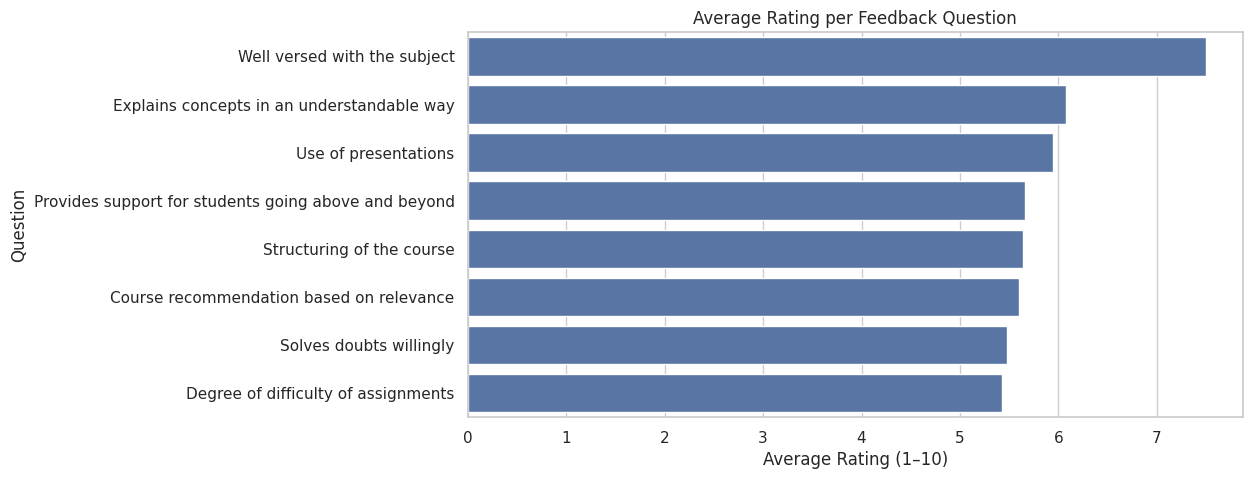

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=mean_scores.values, y=mean_scores.index)
plt.xlabel("Average Rating (1–10)")
plt.ylabel("Question")
plt.title("Average Rating per Feedback Question")
plt.show()


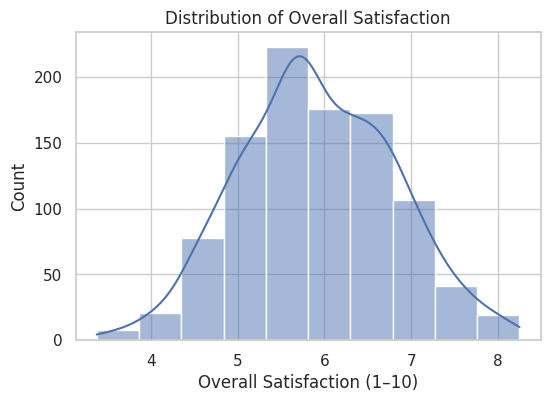

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Overall_Satisfaction'], bins=10, kde=True)
plt.title("Distribution of Overall Satisfaction")
plt.xlabel("Overall Satisfaction (1–10)")
plt.show()


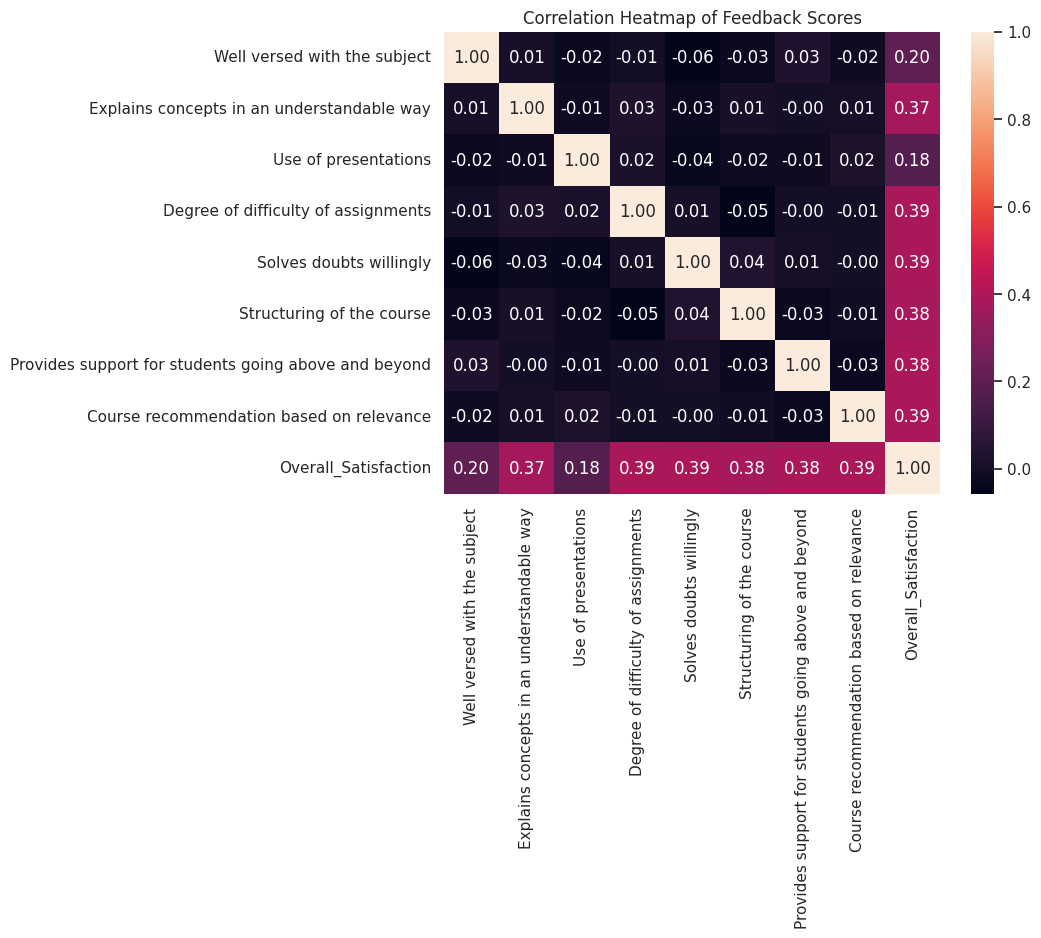

In [13]:
plt.figure(figsize=(8,6))
corr = df[rating_cols + ['Overall_Satisfaction']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Feedback Scores")
plt.show()


In [14]:
def rating_to_sentiment(x):
    if x <= 3:
        return "Negative"
    elif x <= 7:
        return "Neutral"
    else:
        return "Positive"

for col in rating_cols:
    sentiment_col = col + " (Sentiment)"
    df[sentiment_col] = df[col].apply(rating_to_sentiment)


In [15]:
for col in rating_cols:
    sentiment_col = col + " (Sentiment)"
    print(f"\nSentiment for: {col}")
    print(df[sentiment_col].value_counts(normalize=True) * 100)



Sentiment for: Well versed with the subject
Well versed with the subject (Sentiment)
Positive    51.148851
Neutral     48.851149
Name: proportion, dtype: float64

Sentiment for: Explains concepts in an understandable way
Explains concepts in an understandable way (Sentiment)
Neutral     43.656344
Positive    34.665335
Negative    21.678322
Name: proportion, dtype: float64

Sentiment for: Use of presentations
Use of presentations (Sentiment)
Neutral     81.718282
Positive    18.281718
Name: proportion, dtype: float64

Sentiment for: Degree of difficulty of assignments
Degree of difficulty of assignments (Sentiment)
Neutral     39.360639
Negative    31.168831
Positive    29.470529
Name: proportion, dtype: float64

Sentiment for: Solves doubts willingly
Solves doubts willingly (Sentiment)
Neutral     40.35964
Negative    29.87013
Positive    29.77023
Name: proportion, dtype: float64

Sentiment for: Structuring of the course
Structuring of the course (Sentiment)
Neutral     39.960040
Posi

In [16]:
df['Overall_Sentiment'] = df['Overall_Satisfaction'].apply(rating_to_sentiment)
df['Overall_Sentiment'].value_counts(normalize=True) * 100


,proportion
Overall_Sentiment,
Neutral,89.51049
Positive,10.48951


In [18]:
df.columns


Index(['Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'Overall_Satisfaction',
       'Teaching_Quality', 'Course_Design', 'Support_Quality',
       'Well versed with the subject (Sentiment)',
       'Explains concepts in an understandable way (Sentiment)',
       'Use of presentations (Sentiment)',
       'Degree of difficulty of assignments (Sentiment)',
       'Solves doubts willingly (Sentiment)',
       'Structuring of the course (Sentiment)',
       'Provides support for students going above and beyond (Sentiment)',
       'Course recommendation based on relevance (Sentiment)',
       'Overall_Sentiment'],
      dtype='object')

In [19]:
def rating_to_sentiment(score):
    if score <= 3:
        return "Negative"
    elif score <= 7:
        return "Neutral"
    else:
        return "Positive"

df['Overall_Sentiment'] = df['Overall_Satisfaction'].apply(rating_to_sentiment)
df['Overall_Sentiment'].value_counts()


,count
Overall_Sentiment,
Neutral,896
Positive,105


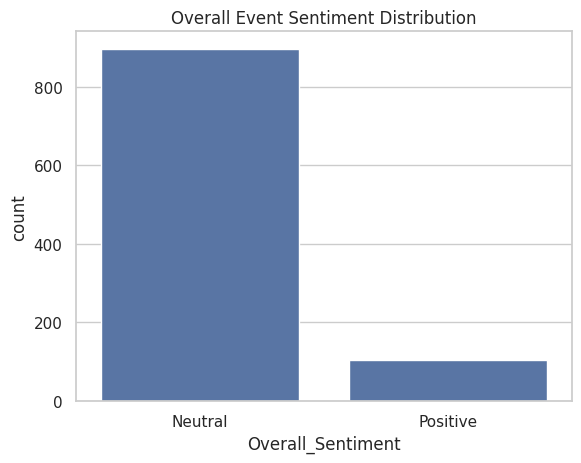

In [20]:
sns.countplot(data=df, x='Overall_Sentiment')
plt.title("Overall Event Sentiment Distribution")
plt.show()


In [23]:
comments = [
    "Great event and very informative",
    "The session was okay but could be better",
    "I had difficulty understanding some concepts",
    "Excellent explanation and interaction",
    "Assignments were too difficult"
]

df['Feedback_Comments'] = [comments[i % len(comments)] for i in range(len(df))]


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['Text_Sentiment_Score'] = df['Feedback_Comments'].apply(
    lambda text: analyzer.polarity_scores(text)['compound']
)

df[['Student ID', 'Feedback_Comments', 'Text_Sentiment_Score']].head()


,Student ID,Feedback_Comments,Text_Sentiment_Score
0,340,Great event and very informative,0.6249
1,253,The session was okay but could be better,0.6486
2,680,I had difficulty understanding some concepts,-0.3400
3,806,Excellent explanation and interaction,0.5719
4,632,Assignments were too difficult,-0.3612


In [25]:
kpi = {
    "Metric": [
        "Average Overall Satisfaction",
        "Positive Sentiment %",
        "Neutral Sentiment %",
        "Negative Sentiment %"
    ],
    "Value": [
        round(df['Overall_Satisfaction'].mean(), 2),
        round((df['Overall_Sentiment'] == "Positive").mean()*100, 2),
        round((df['Overall_Sentiment'] == "Neutral").mean()*100, 2),
        round((df['Overall_Sentiment'] == "Negative").mean()*100, 2)
    ]
}

pd.DataFrame(kpi)


,Metric,Value
0,Average Overall Satisfaction,5.92
1,Positive Sentiment %,10.49
2,Neutral Sentiment %,89.51
3,Negative Sentiment %,0.00


Assumptions & Limitations

The survey dataset contained only numeric ratings without open-ended textual feedback.

Sentiment categories were derived by mapping numeric scores to Positive, Neutral, and Negative labels.

NLP-based sentiment analysis using VADER was demonstrated using sample text feedback due to data limitations.

Results depend on participant honesty and sample size.

Conclusion:

This project analyzed student feedback collected after a college event to evaluate overall satisfaction, identify strengths, and highlight improvement areas. The analysis revealed generally positive student sentiment, particularly toward teaching clarity and doubt resolution, while assignment difficulty and course structure showed scope for enhancement. Visualizations and sentiment mapping provided actionable insights that can help organizers improve future events and learning experiences.*italicized text*